In [1]:
pip install pandas matplotlib seaborn scikit-learn


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


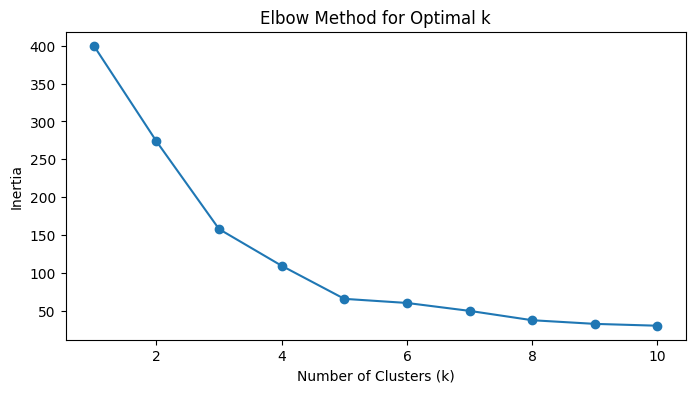

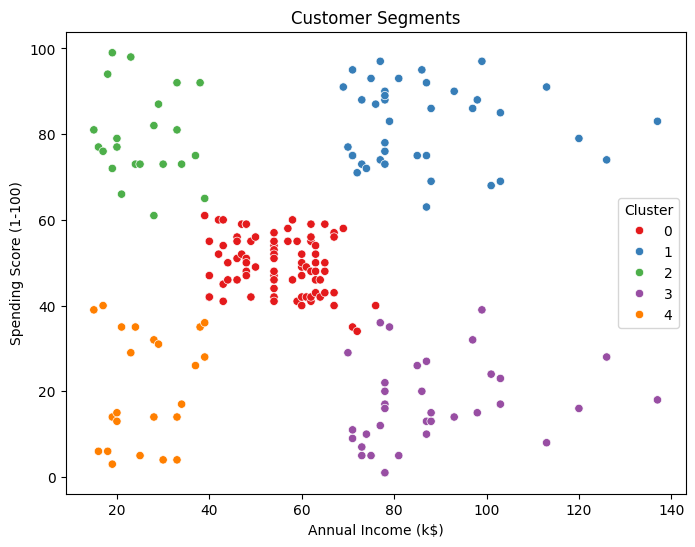

In [3]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 2: Load Dataset
df = pd.read_csv('Mall_Customers.csv')
print(df.head())

# Step 3: Drop CustomerID (not useful for clustering)
df = df.drop('CustomerID', axis=1)

# Step 4: Convert Categorical Gender to Numeric (Optional)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Step 5: Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 6: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Find optimal number of clusters using Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Step 8: Apply KMeans with chosen k (e.g., k=5)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 9: Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1')
plt.title('Customer Segments')
plt.show()


In [4]:
df.groupby('Cluster').mean()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,0.592593,42.716049,55.296296,49.518519
1,0.538462,32.692308,86.538462,82.128205
2,0.590909,25.272727,25.727273,79.363636
3,0.457143,41.114286,88.200000,17.114286
4,0.608696,45.217391,26.304348,20.913043
